# Import libraries

# Summary

This is a use case on linear regression using pytorch. We generate x_train and y_train values and define a linear regression model by inheriting from the base class. We create an instance of the model, define learning rate, optimizer, loss function and train the model for 100 epochs. We calculate the outputs and compare with the original values.

In [1]:
from scipy import stats
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
np.random.seed(1)
n = 50
x = np.random.randn(n)
y = np.random.randn(n)

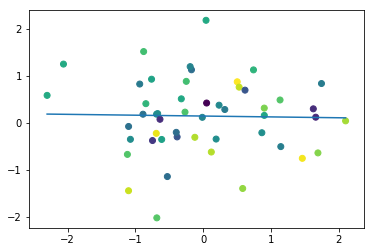

In [13]:
colors = np.random.randn(n)
plt.plot(np.unique(x),np.poly1d(np.polyfit(x,y,1))(np.unique(x)))
plt.scatter(x,y,c =colors,alpha = 2)

# X_train and y_train values

In [16]:
x_values = [i for i in range(11)]

In [17]:
x_values

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [65]:
x_train = np.array(x_values,dtype = float)

In [66]:
type(x_train)

numpy.ndarray

In [67]:
x_train.shape

(11,)

In [68]:
x_train = np.reshape(x_train,(-1,1))

In [69]:
y_values = [2*i + 1 for i in range(11)]

In [70]:
y_values

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]

In [71]:
y_train = np.array(y_values,dtype = float)

In [72]:
y_train = np.reshape(y_train,(-1,1))

In [73]:
x_train,y_train

(array([[ 0.],
        [ 1.],
        [ 2.],
        [ 3.],
        [ 4.],
        [ 5.],
        [ 6.],
        [ 7.],
        [ 8.],
        [ 9.],
        [10.]]), array([[ 1.],
        [ 3.],
        [ 5.],
        [ 7.],
        [ 9.],
        [11.],
        [13.],
        [15.],
        [17.],
        [19.],
        [21.]]))

# Import torch

In [74]:
import torch
import torch.nn as nn
from torch.autograd import variable

# Linear regression model

In [75]:
class LinearRegressionModel(nn.Module):    # inheriting from base class
    def __init__(self,input_size,output_size):
        super().__init__()
        self.linear = nn.Linear(input_dim,output_dim)
        
    def forward(self,x):
        out = self.linear(x)
        return out

# Instantiate the model

In [81]:
input_dim = 1
output_dim = 1

model = LinearRegressionModel(input_dim,input_dim).double()

# Define loss, learning rate and optimizer

In [82]:
criterion = nn.MSELoss()

learning_rate = 0.01

optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

# Train the model

In [83]:
epochs = 100

In [87]:
for epoch in range(epochs):
    epoch += 1
    inputs = variable(torch.from_numpy(x_train))
    labels = variable(torch.from_numpy(y_train))
    
    optimizer.zero_grad() # resetting the gradient
    
    outputs = model(inputs)
    
    loss = criterion(outputs,labels) # datatypes must be the same 
    loss.backward() # finding A in y = Ax +b
    optimizer.step()
    
    print("epoch {}, loss{}".format(epoch,loss.data[0]))

epoch 1, loss14.352603861287134
epoch 2, loss1.1804423910146982
epoch 3, loss0.10592191830615896
epoch 4, loss0.018169059865231537
epoch 5, loss0.010904923436841983
epoch 6, loss0.010207186354305757
epoch 7, loss0.010046224768926923
epoch 8, loss0.009930208170066424
epoch 9, loss0.009819006520276579
epoch 10, loss0.009709333709139205
epoch 11, loss0.00960090901236313
epoch 12, loss0.009493696987189179
epoch 13, loss0.0093876823377861
epoch 14, loss0.009282851550167528
epoch 15, loss0.00917919139266287
epoch 16, loss0.009076688792075974
epoch 17, loss0.00897533082207148
epoch 18, loss0.008875104700731688
epoch 19, loss0.00877599778887816
epoch 20, loss0.008677997588473062
epoch 21, loss0.008581091741041692
epoch 22, loss0.008485268026115215
epoch 23, loss0.00839051435968826
epoch 24, loss0.008296818792695936
epoch 25, loss0.008204169509506693
epoch 26, loss0.00811255482643225
epoch 27, loss0.008021963190254385
epoch 28, loss0.007932383176767532
epoch 29, loss0.007843803489338856
epoch 3

/opt/anaconda3/lib/python3.6/site-packages/torch/autograd/__init__.py:167: UserWarning: torch.autograd.variable(...) is deprecated, use torch.tensor(...) instead
  warnings.warn("torch.autograd.variable(...) is deprecated, use torch.tensor(...) instead")
/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  


# Outputs

In [88]:
outputs

tensor([[ 0.8888],
        [ 2.9048],
        [ 4.9208],
        [ 6.9368],
        [ 8.9529],
        [10.9689],
        [12.9849],
        [15.0009],
        [17.0169],
        [19.0329],
        [21.0489]], dtype=torch.float64, grad_fn=<ThAddmmBackward>)

In [89]:
labels

tensor([[ 1.],
        [ 3.],
        [ 5.],
        [ 7.],
        [ 9.],
        [11.],
        [13.],
        [15.],
        [17.],
        [19.],
        [21.]], dtype=torch.float64)

In [90]:
y_train

array([[ 1.],
       [ 3.],
       [ 5.],
       [ 7.],
       [ 9.],
       [11.],
       [13.],
       [15.],
       [17.],
       [19.],
       [21.]])